# 02. Knowledge Representation | تمثيل المعرفة

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 02, Unit 2** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 02. Knowledge Representation | تمثيل المعرفة

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Notebook 1: Search Algorithms** - Understanding graphs, nodes, and edges
- ✅ **Python Classes** - Object-oriented programming (from Python Essentials Part 2)
- ✅ **Lists and Dictionaries** - Understanding data structures (from Python Essentials Part 1)

**Python Skills Needed**:
- ✅ Creating classes and objects
- ✅ Using dictionaries and lists
- ✅ Understanding inheritance (conceptually)

**If you haven't completed Notebook 1**, you might struggle with:
- Understanding graph concepts (nodes, edges, relationships)
- Understanding how knowledge graphs work
- Understanding the relationship between search and knowledge representation

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This notebook comes AFTER Notebook 1**

**Builds on**:
- 📓 **Notebook 1: Search Algorithms** - Graph concepts (nodes, edges, relationships)

**Leads to**:
- 📓 **Notebook 3: Learning under Uncertainty** - Uses reasoning concepts (forward/backward chaining)
- 📓 **Notebook 5: AI Learning Models** - Uses data structures and reasoning

**Why this order?**
1. **After Search Algorithms**: We learned about graphs (nodes and edges). Knowledge representation uses the SAME concepts (entities = nodes, relationships = edges)!
2. **Before Uncertainty**: We learn reasoning with CERTAIN facts first, then learn reasoning with UNCERTAIN facts (probabilities).
3. **Foundation for AI**: All AI systems need to represent and reason about knowledge!

---

## The Story: Building a Knowledge System | القصة: بناء نظام معرفي

**BEFORE**: We have scattered information - "Socrates is human", "Humans are mortal" - but no way to connect them or reason about them.

**AFTER**: We'll build a knowledge system that can store facts, find connections, and even **INFER** new knowledge (like "Socrates is mortal")!

Think of it like building a library: BEFORE you have books scattered on the floor, AFTER you organize them so you can find any book instantly!

---

## Why Python for Knowledge Representation? | لماذا بايثون لتمثيل المعرفة؟

Python's flexible structures make it perfect for representing knowledge:
- **Classes**: Model entities and their relationships
- **Dictionaries**: Fast lookups and associations
- **Graphs**: Visualize complex relationships
- **Rules**: Implement logical reasoning

## Learning Objectives | أهداف التعلم
1. Represent knowledge using Python data structures
2. Build knowledge graphs (see BEFORE/AFTER transformations)
3. Implement rule-based reasoning
4. Visualize knowledge connections
5. Understand how knowledge representation builds on graph concepts

## Part 1: BEFORE - Scattered Facts | الجزء الأول: قبل - الحقائق المتناثرة

**BEFORE**: Just isolated facts with no structure. Let's see what happens when we add structure!

In [1]:
# BEFORE: Just isolated facts - no structure!
# These facts are floating around with no connections

fact1 = "Socrates is a Human"
fact2 = "Humans are Mortal"
fact3 = "Socrates is a Philosopher"
fact4 = "Plato is a Human"
fact5 = "Plato studied under Socrates"

print("❌ BEFORE: Scattered Facts (No Structure)")
print("=" * 60)
for i, fact in enumerate([fact1, fact2, fact3, fact4, fact5], 1):
    print(f"{i}. {fact}")

print("\n❌ Problems with this approach:")
print("   • No way to query: 'What do we know about Socrates?'")
print("   • No way to connect: 'Since Socrates is Human and Humans are Mortal...'")
print("   • No way to infer: 'Therefore Socrates is Mortal'")
print("   • No structure for relationships")
print("   • Hard to visualize connections")
print("\n🔧 Solution: Use Python classes to structure knowledge!")

❌ BEFORE: Scattered Facts (No Structure)
1. Socrates is a Human
2. Humans are Mortal
3. Socrates is a Philosopher
4. Plato is a Human
5. Plato studied under Socrates

❌ Problems with this approach:
   • No way to query: 'What do we know about Socrates?'
   • No way to connect: 'Since Socrates is Human and Humans are Mortal...'
   • No way to infer: 'Therefore Socrates is Mortal'
   • No structure for relationships
   • Hard to visualize connections

🔧 Solution: Use Python classes to structure knowledge!


## Part 2: AFTER - Structured Knowledge Base | الجزء الثاني: بعد - قاعدة معرفية منظمة

### 📚 Prerequisites (What You Need First)
- ✅ **Python Classes** - Understanding object-oriented programming
- ✅ **Lists and Dictionaries** - Understanding data structures

### 🔗 Relationship: What This Builds On
This is the **FOUNDATION** - everything else builds on this!
- Builds on: Facts and rules representation (Part 1)
- Comes BEFORE: Knowledge graphs, Rules, Semantic networks (all need this)
- Foundation for: All knowledge representation methods

### 📖 The Story
**AFTER**: We create a structured system that can store, query, and reason about facts!

In [2]:
# Step 1: Define a Fact class
# This represents a single piece of knowledge: Subject-Predicate-Object
# Example: "Socrates" (subject) "is_a" (predicate) "Human" (object)

class Fact:
    """
    Represents a single fact in knowledge base.
    
    Structure: Subject -> Predicate -> Object
    Example: "Socrates" -> "is_a" -> "Human"
    
    Why use a class? Because we can:
    - Store structured data
    - Add methods to work with facts
    - Compare facts easily
    """
    def __init__(self, subject, predicate, object_val):
        """
        Initialize a fact with three components:
        - subject: Who/what (e.g., "Socrates")
        - predicate: Relationship (e.g., "is_a", "studied_under")
        - object_val: What it relates to (e.g., "Human", "Plato")
        """
        self.subject = subject      # Store subject
        self.predicate = predicate  # Store predicate (relationship type)
        self.object = object_val    # Store object
    
    def __repr__(self):
        """
        Pretty print the fact.
        When we print a Fact object, it shows: Fact(Socrates, is_a, Human)
        """
        return f"Fact({self.subject}, {self.predicate}, {self.object})"

# Step 2: Create a Knowledge Base class
# This is our "memory" - it stores facts and allows us to query them

class KnowledgeBase:
    """
    A simple knowledge base using Python structures.
    
    This is our "memory" - it stores facts and allows us to:
    1. Add new facts
    2. Query facts (find facts matching criteria)
    3. Get statistics about what we know
    
    BEFORE: We had scattered strings
    AFTER: We have structured storage with query capabilities!
    """
    def __init__(self):
        """
        Initialize an empty knowledge base.
        We start with no facts and no rules.
        """
        self.facts = []  # List to store all facts (our memory!)
        self.rules = []  # List to store rules (we'll use this later)
        print("✅ Created new Knowledge Base (empty - ready to learn!)")
    
    def add_fact(self, subject, predicate, object_val):
        """
        Add a fact to the knowledge base.
        
        Process:
        1. Create a Fact object from the components
        2. Add it to our facts list (store it in memory)
        3. Return the fact (in case we want to use it later)
        """
        fact = Fact(subject, predicate, object_val)  # Create fact object
        self.facts.append(fact)  # Add to our knowledge base (store in memory)
        print(f"  ➕ Added: {fact}")  # Show what we added (for learning!)
        return fact  # Return it (useful for chaining operations)
    
    def query(self, subject=None, predicate=None, object_val=None):
        """
        Query facts matching given criteria.
        
        This is powerful! We can ask:
        - "What do we know about Socrates?" (subject='Socrates')
        - "What relationships involve 'is_a'?" (predicate='is_a')
        - "Who/what is a Human?" (object_val='Human')
        - Or any combination!
        
        Parameters:
        - subject: Filter by subject (who/what)
        - predicate: Filter by predicate (relationship type)
        - object_val: Filter by object (what it relates to)
        
        Returns: List of matching Fact objects
        """
        results = []  # List to store matching facts
        
        # Go through each fact in our knowledge base
        for fact in self.facts:
            # Check if this fact matches all our criteria
            # (If a criteria is None, we don't filter on it - means "match anything")
            matches_subject = (subject is None or fact.subject == subject)
            matches_predicate = (predicate is None or fact.predicate == predicate)
            matches_object = (object_val is None or fact.object == object_val)
            
            # If all specified criteria match, include this fact
            if matches_subject and matches_predicate and matches_object:
                results.append(fact)  # Add to results
        
        return results  # Return all matching facts
    
    def __repr__(self):
        """
        Show summary of knowledge base.
        When we print the knowledge base, it shows: KnowledgeBase(5 facts, 0 rules)
        """
        return f"KnowledgeBase({len(self.facts)} facts, {len(self.rules)} rules)"

# Step 3: Create a knowledge base and add facts
# NOW we can see the difference!

print("\n" + "=" * 60)
print("✅ AFTER: Structured Knowledge Base")
print("=" * 60)
print("\n📝 Creating knowledge base and adding facts...\n")

kb = KnowledgeBase()  # Create empty knowledge base

print("\n➕ Adding facts:")
kb.add_fact("Socrates", "is_a", "Human")       # Socrates is a Human
kb.add_fact("Humans", "are", "Mortal")          # Humans are Mortal
kb.add_fact("Socrates", "is_a", "Philosopher")  # Socrates is a Philosopher
kb.add_fact("Plato", "is_a", "Human")           # Plato is a Human
kb.add_fact("Plato", "studied_under", "Socrates")  # Plato studied under Socrates

print(f"\n📊 Knowledge Base Status: {kb}")
print(f"✅ Now we have {len(kb.facts)} structured facts (instead of scattered strings)!")


✅ AFTER: Structured Knowledge Base

📝 Creating knowledge base and adding facts...

✅ Created new Knowledge Base (empty - ready to learn!)

➕ Adding facts:
  ➕ Added: Fact(Socrates, is_a, Human)
  ➕ Added: Fact(Humans, are, Mortal)
  ➕ Added: Fact(Socrates, is_a, Philosopher)
  ➕ Added: Fact(Plato, is_a, Human)
  ➕ Added: Fact(Plato, studied_under, Socrates)

📊 Knowledge Base Status: KnowledgeBase(5 facts, 0 rules)
✅ Now we have 5 structured facts (instead of scattered strings)!


In [3]:
# Step 4: Query the knowledge base
# NOW we can ask questions and get answers!
# This is the power of structured knowledge!

print("\n" + "=" * 60)
print("🔍 QUERYING KNOWLEDGE BASE (The Power of Structure!)")
print("=" * 60)

# Query 1: What do we know about Socrates?
print("\n❓ Query 1: What do we know about Socrates?")
socrates_facts = kb.query(subject="Socrates")
print(f"   Found {len(socrates_facts)} fact(s):")
for fact in socrates_facts:
    print(f"      • {fact.subject} {fact.predicate} {fact.object}")

# Query 2: What relationships use 'is_a'?
print("\n❓ Query 2: What relationships use 'is_a'?")
is_a_facts = kb.query(predicate="is_a")
print(f"   Found {len(is_a_facts)} fact(s):")
for fact in is_a_facts:
    print(f"      • {fact.subject} {fact.predicate} {fact.object}")

# Query 3: Who/what is a Human?
print("\n❓ Query 3: Who/what is a Human?")
human_facts = kb.query(object_val="Human")
print(f"   Found {len(human_facts)} fact(s):")
for fact in human_facts:
    print(f"      • {fact.subject} {fact.predicate} {fact.object}")

print("\n" + "=" * 60)
print("✅ BEFORE vs AFTER Comparison:")
print("   BEFORE: Had to manually search through text")
print("   AFTER: Can query structured data instantly!")
print("   BEFORE: No way to find connections")
print("   AFTER: Can query by any component (subject, predicate, object)!")


🔍 QUERYING KNOWLEDGE BASE (The Power of Structure!)

❓ Query 1: What do we know about Socrates?
   Found 2 fact(s):
      • Socrates is_a Human
      • Socrates is_a Philosopher

❓ Query 2: What relationships use 'is_a'?
   Found 3 fact(s):
      • Socrates is_a Human
      • Socrates is_a Philosopher
      • Plato is_a Human

❓ Query 3: Who/what is a Human?
   Found 2 fact(s):
      • Socrates is_a Human
      • Plato is_a Human

✅ BEFORE vs AFTER Comparison:
   BEFORE: Had to manually search through text
   AFTER: Can query structured data instantly!
   BEFORE: No way to find connections
   AFTER: Can query by any component (subject, predicate, object)!


## Part 3: Knowledge Graphs with NetworkX | الجزء الثالث: الرسوم البيانية للمعرفة مع NetworkX

### 📚 Prerequisites (What You Need First)
- ✅ **Knowledge Base** (from Part 2) - Understanding structured facts
- ✅ **Graph concepts** - Understanding nodes and edges
- ✅ **NetworkX library** - Tool for graph operations

### 🔗 Relationship: What This Builds On
This builds on knowledge bases and adds VISUALIZATION!
- Builds on: Knowledge Base (Part 2) - uses facts to create graphs
- Extends: Knowledge Base with visual representation
- Comes BEFORE: Semantic networks (which also use graphs)
- Foundation for: Visual knowledge representation

### 📖 The Story
**BEFORE**: We have facts but can't see the connections visually.
**AFTER**: We create knowledge graphs that visualize relationships - see connections at a glance!

✅ NetworkX imported successfully!
📊 CREATING KNOWLEDGE GRAPH

✅ Created new Knowledge Graph

➕ Adding relationships:
  ➕ Added edge: Socrates --[is_a]--> Human
  ➕ Added edge: Human --[is_a]--> Mammal
  ➕ Added edge: Mammal --[is_a]--> Animal
  ➕ Added edge: Plato --[is_a]--> Human
  ➕ Added edge: Plato --[studied_under]--> Socrates
  ➕ Added edge: Aristotle --[studied_under]--> Plato

📊 Visualizing knowledge graph...


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_49351/3031982879.py:141: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust spacing
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


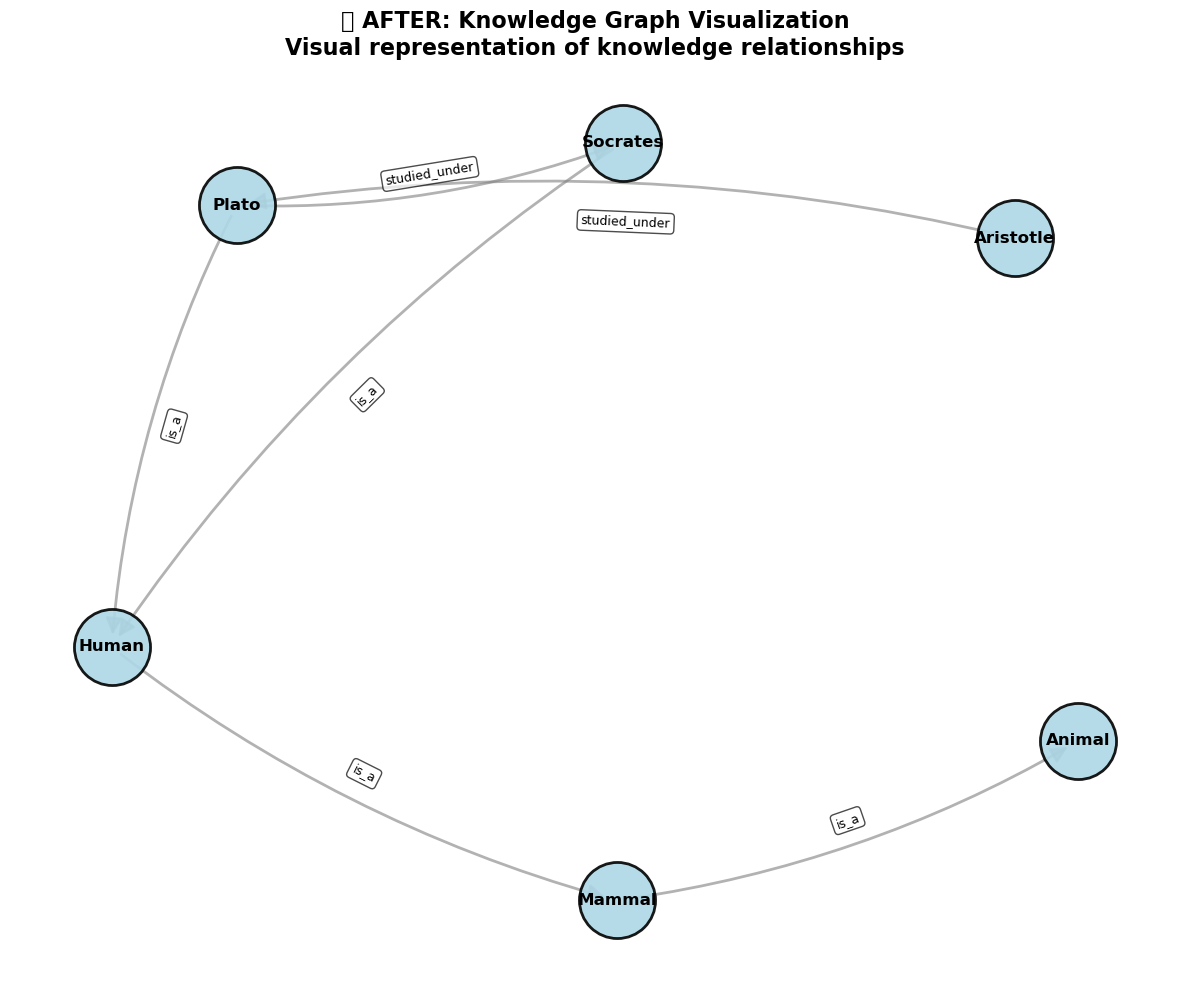


📊 Graph Statistics:
   Nodes (entities): 6
   Edges (relationships): 6

🔍 Finding relationship path:
   Path from Socrates to Animal: Socrates -> Human -> Mammal -> Animal
   Relationship: Socrates is a Human, Human is a Mammal, Mammal is an Animal

✅ BEFORE vs AFTER:
   BEFORE: Just facts - can't see connections
   AFTER: Beautiful graph - see all relationships visually!


In [4]:
# Knowledge Graphs with NetworkX
# BEFORE: Can't visualize connections between entities
# AFTER: Beautiful graph visualization showing all relationships!

try:
    import networkx as nx  # NetworkX: Powerful graph library
    import matplotlib.pyplot as plt  # For visualization
    HAS_NETWORKX = True
    print("✅ NetworkX imported successfully!")
except ImportError:
    HAS_NETWORKX = False
    print("⚠️  NetworkX not installed. Install with: pip install networkx matplotlib")
    print("   Continuing without NetworkX for demonstration...")

class KnowledgeGraph:
    """
    Knowledge Graph: Visual representation of knowledge.
    
    THE PROBLEM: Facts are stored but connections aren't visible.
    THE SOLUTION: Create a graph where:
    - Nodes = Entities (Socrates, Human, etc.)
    - Edges = Relationships (is_a, studied_under, etc.)
    
    This lets us SEE the knowledge structure!
    """
    def __init__(self):
        """Initialize an empty knowledge graph"""
        self.nodes = set()  # Set of all entities (nodes)
        self.edges = []  # List of (source, relation, target) tuples
        
        # If NetworkX is available, create a graph object
        if HAS_NETWORKX:
            self.graph = nx.MultiDiGraph()  # MultiDiGraph: Multiple directed edges allowed
        print("✅ Created new Knowledge Graph")
    
    def add_node(self, node, **attributes):
        """
        Add a node (entity) to the graph.
        
        Parameters:
        - node: The entity name (e.g., "Socrates")
        - **attributes: Additional properties (e.g., type="person")
        """
        self.nodes.add(node)  # Add to our set of nodes
        
        # If NetworkX is available, add to graph
        if HAS_NETWORKX:
            self.graph.add_node(node, **attributes)  # Add node with attributes
    
    def add_edge(self, source, relation, target):
        """
        Add a relationship edge to the graph.
        
        This creates a connection: source --[relation]--> target
        Example: Socrates --[is_a]--> Human
        
        Parameters:
        - source: Source entity (e.g., "Socrates")
        - relation: Relationship type (e.g., "is_a")
        - target: Target entity (e.g., "Human")
        """
        # Add both nodes (they'll be added if they don't exist)
        self.add_node(source)  # Ensure source node exists
        self.add_node(target)  # Ensure target node exists
        
        # Add edge to our edge list
        self.edges.append((source, relation, target))  # Store edge information
        
        # If NetworkX is available, add to graph
        if HAS_NETWORKX:
            self.graph.add_edge(source, target, relation=relation)  # Add edge with label
        
        print(f"  ➕ Added edge: {source} --[{relation}]--> {target}")
    
    def visualize(self):
        """
        Visualize the knowledge graph.
        
        BEFORE: Just text - hard to see connections
        AFTER: Beautiful graph showing all relationships visually!
        """
        if not HAS_NETWORKX:
            # Fallback: Text representation
            print("\n📊 Knowledge Graph (Text Representation):")
            for source, relation, target in self.edges:
                print(f"   {source} --[{relation}]--> {target}")
            return
        
        # Create visualization with NetworkX
        plt.figure(figsize=(12, 10))  # Create figure with specific size
        
        # Calculate layout (where to position nodes)
        # spring_layout: Positions nodes using force-directed algorithm (looks nice!)
        pos = nx.spring_layout(self.graph, k=2, iterations=50)
        
        # Draw nodes (entities) - these are the circles
        nx.draw_networkx_nodes(
            self.graph, pos,
            node_color='lightblue',  # Color of nodes
            node_size=3000,  # Size of nodes
            alpha=0.9,  # Transparency
            edgecolors='black',  # Border color
            linewidths=2  # Border width
        )
        
        # Draw edges (relationships) - these are the arrows
        nx.draw_networkx_edges(
            self.graph, pos,
            alpha=0.6,  # Transparency
            arrows=True,  # Show direction with arrows
            arrowsize=25,  # Size of arrows
            edge_color='gray',  # Color of edges
            width=2,  # Width of edges
            connectionstyle='arc3,rad=0.1'  # Curved edges (looks nicer)
        )
        
        # Draw node labels (entity names)
        nx.draw_networkx_labels(
            self.graph, pos,
            font_size=12,  # Size of text
            font_weight='bold'  # Make text bold
        )
        
        # Draw edge labels (relationship names)
        edge_labels = {}
        for u, v, d in self.graph.edges(data=True):
            relation = d.get('relation', '')
            edge_labels[(u, v)] = relation  # Label edge with relation name
        
        nx.draw_networkx_edge_labels(
            self.graph, pos,
            edge_labels=edge_labels,
            font_size=9,  # Size of edge labels
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)  # Background for labels
        )
        
        plt.title("✅ AFTER: Knowledge Graph Visualization\n" + 
                 "Visual representation of knowledge relationships", 
                 fontsize=16, fontweight='bold')
        plt.axis('off')  # Hide axes (looks cleaner)
        plt.tight_layout()  # Adjust spacing
        plt.show()  # Display the graph
        
        print("\n📊 Graph Statistics:")
        print(f"   Nodes (entities): {self.graph.number_of_nodes()}")
        print(f"   Edges (relationships): {self.graph.number_of_edges()}")
    
    def find_path(self, start, end):
        """
        Find relationship path between two nodes.
        
        Example: Find path from "Socrates" to "Animal"
        Path: Socrates --[is_a]--> Human --[is_a]--> Mammal --[is_a]--> Animal
        """
        if not HAS_NETWORKX:
            # Simple BFS path finding without NetworkX
            from collections import deque
            
            queue = deque([(start, [start])])  # (current_node, path_so_far)
            visited = {start}  # Track visited nodes
            
            while queue:
                current, path = queue.popleft()  # Get next node
                
                if current == end:
                    return path  # Found path!
                
                # Check all edges from current node
                for source, relation, target in self.edges:
                    if source == current and target not in visited:
                        visited.add(target)
                        queue.append((target, path + [target]))  # Extend path
            
            return None  # No path found
        else:
            # Use NetworkX shortest_path (much faster!)
            try:
                path = nx.shortest_path(self.graph, start, end)  # Find shortest path
                return path  # Return path as list of nodes
            except nx.NetworkXNoPath:
                return None  # No path exists

# Create a knowledge graph
print("=" * 70)
print("📊 CREATING KNOWLEDGE GRAPH")
print("=" * 70)
print()

kg = KnowledgeGraph()  # Create empty graph

print("\n➕ Adding relationships:")
# Add relationships (edges)
kg.add_edge("Socrates", "is_a", "Human")  # Socrates is a Human
kg.add_edge("Human", "is_a", "Mammal")  # Human is a Mammal
kg.add_edge("Mammal", "is_a", "Animal")  # Mammal is an Animal
kg.add_edge("Plato", "is_a", "Human")  # Plato is a Human
kg.add_edge("Plato", "studied_under", "Socrates")  # Plato studied under Socrates
kg.add_edge("Aristotle", "studied_under", "Plato")  # Aristotle studied under Plato

print("\n📊 Visualizing knowledge graph...")
kg.visualize()  # Create beautiful visualization!

# Find path between entities
print("\n🔍 Finding relationship path:")
path = kg.find_path("Socrates", "Animal")
if path:
    print(f"   Path from Socrates to Animal: {' -> '.join(path)}")
    print(f"   Relationship: Socrates is a Human, Human is a Mammal, Mammal is an Animal")
else:
    print("   No path found")

print("\n✅ BEFORE vs AFTER:")
print("   BEFORE: Just facts - can't see connections")
print("   AFTER: Beautiful graph - see all relationships visually!")

## Part 4: Rule-Based Systems | الجزء الرابع: الأنظمة القائمة على القواعد

### 📚 Prerequisites (What You Need First)
- ✅ **Knowledge Base** (from Part 2) - Understanding facts storage
- ✅ **If-then rules** - Understanding logical reasoning

### 🔗 Relationship: What This Builds On
This adds REASONING to knowledge bases!
- Builds on: Knowledge Base (Part 2) - adds rules on top of facts
- Comes BEFORE: Forward/Backward chaining (which use rules)
- Foundation for: Inference engines

### 📖 The Story
**BEFORE**: We have facts but can't derive new knowledge from them.
**AFTER**: We use rules to INFER new facts automatically (like "Socrates is mortal" from "Socrates is human" and "Humans are mortal")!

### 🎯 Key Concepts You'll Learn:
1. **Rules**: IF conditions THEN conclusion (e.g., "IF X is Human AND Humans are Mortal THEN X is Mortal")
2. **Forward Chaining**: Start with facts → apply rules → derive new facts (data-driven)
3. **Variables in Rules**: Use "X" to match any entity (pattern matching)
4. **Why Check Before Adding**: Prevents infinite loops (same rule adding same fact repeatedly)

In [5]:
# Rule-Based Systems: Forward Chaining
# BEFORE: Have facts but can't derive new facts
# AFTER: Use rules to automatically infer new knowledge!

class Rule:
    """
    Represents an if-then rule.
    
    Structure: IF conditions THEN conclusion
    Example: IF X is_a Human AND Humans are Mortal THEN X is Mortal
    
    This allows us to derive new facts from existing ones!
    """
    def __init__(self, conditions, conclusion, name=""):
        """
        Initialize a rule.
        
        Parameters:
        - conditions: List of facts that must be true (IF part)
        - conclusion: Fact that becomes true when conditions are met (THEN part)
        - name: Name of the rule (for identification)
        """
        self.conditions = conditions  # List of (subject, predicate, object) tuples
        self.conclusion = conclusion  # (subject, predicate, object) tuple
        self.name = name  # Rule name
    
    def can_apply(self, knowledge_base):
        """
        Check if this rule can be applied.
        
        A rule can be applied if ALL its conditions are true.
        Handles simple variable substitution (e.g., "X" matches any entity).
        """
        variable_bindings = {}  # Store variable substitutions
        
        # Check each condition
        for condition in self.conditions:
            subject, predicate, object_val = condition
            
            # Handle variable substitution
            # If subject is already bound, use the bound value
            if subject in variable_bindings:
                subject = variable_bindings[subject]
            # If subject is a variable (single uppercase letter like "X")
            elif subject.isupper() and len(subject) == 1:
                # Find all facts matching the predicate and object
                matching_facts = knowledge_base.query(predicate=predicate, object_val=object_val)
                if not matching_facts:
                    return False, {}  # No matching facts found
                # Use first match and bind variable
                actual_subject = matching_facts[0].subject
                variable_bindings[subject] = actual_subject
                subject = actual_subject
            
            # Check if this fact exists in knowledge base
            if not knowledge_base.has_fact((subject, predicate, object_val)):
                return False, {}  # Condition not met, rule can't be applied
        
        return True, variable_bindings  # All conditions met, rule can be applied!
    
    def apply(self, knowledge_base):
        """
        Apply this rule to the knowledge base.
        
        If all conditions are met, add the conclusion as a new fact.
        Returns True if rule was applied, False otherwise.
        """
        result = self.can_apply(knowledge_base)
        if isinstance(result, tuple):
            can_apply, variable_bindings = result
        else:
            can_apply = result
            variable_bindings = {}
        
        if can_apply:
            # All conditions are met - apply the conclusion
            # Handle variable substitution in conclusion
            subject, predicate, object_val = self.conclusion
            if subject in variable_bindings:
                subject = variable_bindings[subject]
            
            # IMPORTANT: Check if fact already exists before adding
            # This prevents infinite loops! Without this check, the same rule would
            # keep adding the same fact over and over again.
            if not knowledge_base.has_fact((subject, predicate, object_val)):
                # Fact doesn't exist - add it
                knowledge_base.add_fact(subject, predicate, object_val)
                return True  # Rule was applied successfully (new fact added)
            else:
                # Fact already exists - rule was already applied before
                return False  # Rule couldn't apply (no new fact needed)
        return False  # Rule couldn't be applied
    
    def __repr__(self):
        """Pretty print the rule"""
        return f"Rule: IF {self.conditions} THEN {self.conclusion}"

class RuleBasedKB(KnowledgeBase):
    """
    Knowledge base with rule-based reasoning.
    
    This extends our basic knowledge base with the ability to:
    1. Store rules
    2. Apply rules using forward chaining
    3. Derive new facts automatically
    """
    def __init__(self):
        """Initialize rule-based knowledge base"""
        super().__init__()  # Initialize parent class (KnowledgeBase)
        self.rules = []  # List to store rules
    
    def add_rule(self, conditions, conclusion, name=""):
        """
        Add a rule to the knowledge base.
        
        Parameters:
        - conditions: List of facts that must be true
        - conclusion: Fact to derive when conditions are met
        - name: Name of the rule
        """
        rule = Rule(conditions, conclusion, name)  # Create rule object
        self.rules.append(rule)  # Add to rules list
        print(f"  ➕ Added rule: {rule.name if rule.name else 'Unnamed'}")
        return rule  # Return rule (for later use)
    
    def has_fact(self, fact_tuple):
        """
        Check if a fact exists in the knowledge base.
        
        Parameters:
        - fact_tuple: (subject, predicate, object) tuple
        
        Returns: True if fact exists, False otherwise
        """
        subject, predicate, object_val = fact_tuple  # Unpack tuple
        # Query for this exact fact
        results = self.query(subject, predicate, object_val)
        return len(results) > 0  # Fact exists if query found something
    
    def forward_chaining(self, max_iterations=100):
        """
        Forward chaining: Apply rules until no more facts can be derived.
        
        HOW IT WORKS:
        1. Go through all rules
        2. Apply rules whose conditions are met
        3. New facts might enable more rules
        4. Repeat until no new facts can be derived
        
        This is how we automatically infer new knowledge!
        """
        iterations = 0  # Track number of iterations
        new_facts = True  # Flag: were new facts derived?
        
        print("\n🔄 Starting Forward Chaining...")
        print("   (Applying rules to derive new facts)\n")
        
        # Keep applying rules until no more facts can be derived
        # This loop continues as long as at least one rule applied in the last iteration
        while new_facts and iterations < max_iterations:
            new_facts = False  # Reset flag - no new facts yet in this iteration
            iterations += 1  # Count iteration
            
            # Try to apply each rule
            for rule in self.rules:
                if rule.apply(self):  # If rule was applied (added a NEW fact)
                    new_facts = True  # We derived a new fact!
                    print(f"   ✅ Applied rule: {rule.name}")
                    print(f"      Derived: {rule.conclusion}")
            
            # If no rules were applied (new_facts = False), the loop will stop
        
        print(f"\n✅ Forward chaining complete! ({iterations} iterations)")
        print("   (Stopped because no more new facts can be derived)")
        return iterations  # Return number of iterations

# Example: Classical logic - Socrates and Mortality
print("=" * 70)
print("✅ AFTER: Rule-Based Reasoning")
print("=" * 70)
print()
print("📝 Creating rule-based knowledge base...")
print()

rb_kb = RuleBasedKB()  # Create rule-based knowledge base

print("\n➕ Adding initial facts:")
# Initial facts (what we know to start with)
rb_kb.add_fact("Socrates", "is_a", "Human")  # Socrates is a Human
rb_kb.add_fact("Humans", "are", "Mortal")  # Humans are Mortal

print("\n➕ Adding rules:")
# Rule: If X is_a Human and Humans are Mortal, then X is Mortal
rb_kb.add_rule(
    [("X", "is_a", "Human"), ("Humans", "are", "Mortal")],  # Conditions
    ("X", "is", "Mortal"),  # Conclusion
    name="Mortality Rule"  # Rule name
)

print("\n📊 BEFORE Forward Chaining:")
print(f"   Facts: {len(rb_kb.facts)}")
for fact in rb_kb.facts:
    print(f"      • {fact}")

# Apply forward chaining (derive new facts!)
rb_kb.forward_chaining()

print("\n📊 AFTER Forward Chaining:")
print(f"   Facts: {len(rb_kb.facts)}")
for fact in rb_kb.facts:
    print(f"      • {fact}")

print("\n✅ BEFORE vs AFTER:")
print("   BEFORE: Had facts but couldn't derive new knowledge")
print("   AFTER: Rules automatically inferred 'Socrates is Mortal'!")

✅ AFTER: Rule-Based Reasoning

📝 Creating rule-based knowledge base...

✅ Created new Knowledge Base (empty - ready to learn!)

➕ Adding initial facts:
  ➕ Added: Fact(Socrates, is_a, Human)
  ➕ Added: Fact(Humans, are, Mortal)

➕ Adding rules:
  ➕ Added rule: Mortality Rule

📊 BEFORE Forward Chaining:
   Facts: 2
      • Fact(Socrates, is_a, Human)
      • Fact(Humans, are, Mortal)

🔄 Starting Forward Chaining...
   (Applying rules to derive new facts)

  ➕ Added: Fact(Socrates, is, Mortal)
   ✅ Applied rule: Mortality Rule
      Derived: ('X', 'is', 'Mortal')

✅ Forward chaining complete! (2 iterations)
   (Stopped because no more new facts can be derived)

📊 AFTER Forward Chaining:
   Facts: 3
      • Fact(Socrates, is_a, Human)
      • Fact(Humans, are, Mortal)
      • Fact(Socrates, is, Mortal)

✅ BEFORE vs AFTER:
   BEFORE: Had facts but couldn't derive new knowledge
   AFTER: Rules automatically inferred 'Socrates is Mortal'!


## Part 5: Backward Chaining | الجزء الخامس: السلسلة الخلفية

### 📚 Prerequisites (What You Need First)
- ✅ **Forward Chaining** (from Part 4) - Understanding rule-based reasoning
- ✅ **Rule-Based Systems** (from Part 4) - Understanding rules
- ✅ **Recursion** - Understanding recursive problem-solving

### 🔗 Relationship: What This Builds On
This is an **ALTERNATIVE** to forward chaining - goal-directed reasoning!
- Builds on: Forward chaining (Part 4) - same rules, different direction
- Alternative to: Forward chaining (different strategy)
- Comes AFTER: Forward chaining (more advanced reasoning)

### 📖 The Story
Forward chaining starts from facts and derives conclusions. But what if we want to PROVE a specific conclusion?

**BEFORE**: We can derive facts, but can't efficiently prove a specific goal.
**AFTER**: Backward chaining starts from a GOAL and works backwards to find supporting facts - perfect for answering specific questions!

### 🎯 Key Difference: Forward vs Backward Chaining
- **Forward Chaining**: Facts → Rules → New Facts (derive everything you can)
- **Backward Chaining**: Goal → Rules → Conditions → Facts (prove one specific thing)
- **When to use each**: 
  - Forward: "What facts can I derive?" (broad exploration)
  - Backward: "Can I prove this specific fact?" (focused proof)

In [6]:
# Backward Chaining: Goal-Directed Reasoning
# BEFORE: Forward chaining derives everything - inefficient if we only want one answer
# AFTER: Backward chaining starts from goal and works backwards - efficient!

def backward_chaining(kb, goal, depth=0, max_depth=10):
    """
    Backward chaining: Start from a goal and work backwards.
    
    THE PROBLEM: We want to prove a specific fact (goal).
    THE SOLUTION: Start from the goal, find rules that conclude it,
                 then recursively prove their conditions!
    
    HOW IT WORKS:
    1. Check if goal is already a fact → SUCCESS!
    2. Find rules whose conclusion matches the goal
    3. For each rule, try to prove ALL its conditions (recursively)
    4. If all conditions are proven → the goal is proven!
    
    Example: Goal = "Socrates is Mortal"
    Find rule: IF X is_a Human AND Humans are Mortal THEN X is Mortal
    Need to prove: "Socrates is_a Human" and "Humans are Mortal"
    """
    indent = "  " * depth  # Indentation for visualization
    print(f"{indent}🔍 Trying to prove: {goal}")
    
    # Check if goal is already a fact
    if kb.has_fact(goal):
        print(f"{indent}✅ Goal is already a fact!")
        return True  # Goal is already true!
    
    if depth >= max_depth:
        print(f"{indent}❌ Maximum depth reached")
        return False  # Prevent infinite recursion
    
    # Find rules that conclude this goal
    # STEP 1: Look through all rules to find ones whose conclusion matches our goal
    applicable_rules = []
    for rule in kb.rules:
        # Check if rule's conclusion matches our goal
        # Handle variable matching: if conclusion has variable (e.g., "X"), it can match any subject
        rule_conclusion = rule.conclusion
        goal_subject, goal_predicate, goal_object = goal
        rule_subject, rule_predicate, rule_object = rule_conclusion
        
        # Check if predicates and objects match (these must match exactly)
        if rule_predicate == goal_predicate and rule_object == goal_object:
            # Now check the subject - can be exact match OR variable match
            if rule_subject.isupper() and len(rule_subject) == 1:
                # Variable in rule (like "X") - can match any goal subject
                # Bind the variable to the goal's subject value
                applicable_rules.append((rule, goal_subject))  # Store rule with bound variable
            elif rule_subject == goal_subject:
                # Exact match - subject matches exactly
                applicable_rules.append((rule, None))
    
    if not applicable_rules:
        print(f"{indent}❌ No rules found to prove this goal")
        return False  # Can't prove it
    
    # Try each applicable rule
    for rule_info in applicable_rules:
        if isinstance(rule_info, tuple):
            rule, bound_var = rule_info
        else:
            rule = rule_info
            bound_var = None
            
        print(f"{indent}📋 Trying rule: {rule.name}")
        
        # STEP 2: Substitute variables in conditions with the actual bound value
        # Example: If rule has variable "X" bound to "Socrates", replace "X" with "Socrates" in conditions
        conditions_to_prove = []
        for condition in rule.conditions:
            cond_subject, cond_predicate, cond_object = condition
            # If condition has a variable (single uppercase letter), substitute it
            if bound_var and cond_subject.isupper() and len(cond_subject) == 1:
                # Replace variable (e.g., "X") with actual value (e.g., "Socrates")
                conditions_to_prove.append((bound_var, cond_predicate, cond_object))
            else:
                # No variable - use condition as-is
                conditions_to_prove.append(condition)
        
        print(f"{indent}   Conditions: {conditions_to_prove}")
        
        # STEP 3: Try to prove ALL conditions (recursively call backward_chaining)
        # All conditions must be true for the rule to apply
        all_conditions_proven = True
        for condition in conditions_to_prove:
            # Recursively try to prove each condition
            if not backward_chaining(kb, condition, depth + 1, max_depth):
                all_conditions_proven = False
                break  # Can't prove this condition, so rule can't apply
        
        if all_conditions_proven:
            # SUCCESS! All conditions proven - we can conclude the goal!
            # Add the fact to the knowledge base (if it doesn't already exist)
            if not kb.has_fact(goal):
                kb.add_fact(*goal)  # Add the proven fact
            print(f"{indent}✅ Goal proven! Added: {goal}")
            return True
    
    return False  # Couldn't prove goal

# Example: Proving "Socrates is Mortal"
print("=" * 70)
print("✅ AFTER: Backward Chaining (Goal-Directed Reasoning)")
print("=" * 70)
print()

bc_kb = RuleBasedKB()  # Create knowledge base

print("➕ Adding facts:")
bc_kb.add_fact("Socrates", "is_a", "Human")
bc_kb.add_fact("Humans", "are", "Mortal")

print("\n➕ Adding rules:")
bc_kb.add_rule(
    [("X", "is_a", "Human"), ("Humans", "are", "Mortal")],
    ("X", "is", "Mortal"),
    name="Mortality Rule"
)

print("\n" + "=" * 70)
print("🎯 PROVING GOAL: Socrates is Mortal")
print("=" * 70)
print()

# Use backward chaining to prove goal
goal = ("Socrates", "is", "Mortal")
result = backward_chaining(bc_kb, goal)

print("\n" + "=" * 70)
if result:
    print("✅ SUCCESS: Goal proven using backward chaining!")
else:
    print("❌ FAILED: Could not prove goal")

print("\n📊 BEFORE vs AFTER:")
print("   BEFORE: Forward chaining derives everything (inefficient for specific goals)")
print("   AFTER: Backward chaining proves specific goals efficiently!")

✅ AFTER: Backward Chaining (Goal-Directed Reasoning)

✅ Created new Knowledge Base (empty - ready to learn!)
➕ Adding facts:
  ➕ Added: Fact(Socrates, is_a, Human)
  ➕ Added: Fact(Humans, are, Mortal)

➕ Adding rules:
  ➕ Added rule: Mortality Rule

🎯 PROVING GOAL: Socrates is Mortal

🔍 Trying to prove: ('Socrates', 'is', 'Mortal')
📋 Trying rule: Mortality Rule
   Conditions: [('Socrates', 'is_a', 'Human'), ('Humans', 'are', 'Mortal')]
  🔍 Trying to prove: ('Socrates', 'is_a', 'Human')
  ✅ Goal is already a fact!
  🔍 Trying to prove: ('Humans', 'are', 'Mortal')
  ✅ Goal is already a fact!
  ➕ Added: Fact(Socrates, is, Mortal)
✅ Goal proven! Added: ('Socrates', 'is', 'Mortal')

✅ SUCCESS: Goal proven using backward chaining!

📊 BEFORE vs AFTER:
   BEFORE: Forward chaining derives everything (inefficient for specific goals)
   AFTER: Backward chaining proves specific goals efficiently!


## Part 6: Semantic Networks | الجزء السادس: الشبكات الدلالية

### 📚 Prerequisites (What You Need First)
- ✅ **Knowledge Graphs** (from Part 3) - Understanding graph representation
- ✅ **Inheritance concepts** - Understanding parent-child relationships

### 🔗 Relationship: What This Builds On
This extends knowledge graphs with INHERITANCE!
- Builds on: Knowledge Graphs (Part 3) - adds inheritance to graphs
- Extends: Graph representation with property inheritance
- Comes BEFORE: Ontologies (which formalize semantic networks)
- More advanced than: Knowledge graphs (adds inheritance)

### 📖 The Story
Knowledge graphs show relationships, but semantic networks add INHERITANCE - properties flow down from parent to child!

**BEFORE**: We have to manually state all properties of each entity.
**AFTER**: Semantic networks automatically INHERIT properties - "Bird" has wings, so "Tweety" (a bird) inherits wings automatically!

### 🎯 Key Concept: Property Inheritance with Override
- **Parent properties**: Automatically inherited by children
- **Child properties**: Can OVERRIDE parent properties (child's values take priority)
- **Example**: Bird has `can_fly=True`, but Penguin (a Bird) has `can_fly=False` → Penguin's value wins!
- **Why important**: Allows exceptions to general rules (Penguins are birds but can't fly)

In [7]:
# Semantic Networks with Inheritance
# BEFORE: Have to state all properties explicitly
# AFTER: Properties inherit automatically from parent classes!

class SemanticNetwork:
    """
    Semantic Network: Knowledge representation with inheritance.
    
    THE PROBLEM: We have to repeat properties for each entity.
    THE SOLUTION: Properties inherit from parent classes!
    
    Example:
    - "Bird" has property: can_fly = True
    - "Tweety" is_a Bird
    - "Tweety" AUTOMATICALLY inherits can_fly = True!
    """
    def __init__(self):
        """Initialize empty semantic network"""
        self.entities = {}  # Dictionary: entity -> properties
        self.relations = {}  # Dictionary: (entity, relation) -> [targets]
        print("✅ Created new Semantic Network")
    
    def add_entity(self, entity, **properties):
        """
        Add an entity with properties.
        
        Parameters:
        - entity: Entity name (e.g., "Bird")
        - **properties: Properties of this entity (e.g., can_fly=True)
        """
        if entity not in self.entities:
            self.entities[entity] = {}  # Create property dictionary
        
        # Add/update properties
        self.entities[entity].update(properties)  # Update properties
        print(f"  ➕ Added entity '{entity}' with properties: {properties}")
    
    def add_relation(self, entity1, relation, entity2):
        """
        Add a relation between entities.
        
        Example: add_relation("Tweety", "is_a", "Bird")
        This means: Tweety is a Bird
        """
        key = (entity1, relation)  # Create key for this relation type
        if key not in self.relations:
            self.relations[key] = []  # Create list if doesn't exist
        
        self.relations[key].append(entity2)  # Add target entity
        print(f"  ➕ Added relation: {entity1} --[{relation}]--> {entity2}")
    
    def infer_inheritance(self, entity):
        """
        Infer all properties of an entity through inheritance.
        
        HOW IT WORKS:
        1. Start with empty properties
        2. Find all ancestors (via "is_a" relations) recursively
        3. Inherit properties from ancestors (distant to close)
        4. Finally apply direct properties (which override inherited)
        
        This is THE SOLUTION - automatic property inheritance!
        FIX: Direct properties should override inherited properties!
        """
        # FIX: Start with empty, then inherit from parents first, then apply direct properties last
        properties = {}  # Start empty
        
        # Find parent entities (via "is_a" relation)
        parent_key = (entity, "is_a")
        parents = self.relations.get(parent_key, [])
        
        # Recursively inherit from each parent
        for parent in parents:
            if parent in self.entities:
                # Recursively get parent's properties (includes its inherited properties)
                parent_props = self.infer_inheritance(parent)
                # Inherit parent's properties
                properties.update(parent_props)
        
        # FIX: Finally apply direct properties LAST (so they override inherited properties)
        direct_props = self.entities.get(entity, {}).copy()
        properties.update(direct_props)  # Direct properties override inherited
        
        return properties  # Return all properties (inherited + direct, with direct overriding)

# Example: Semantic Network with Inheritance
print("=" * 70)
print("✅ AFTER: Semantic Networks with Inheritance")
print("=" * 70)
print()

sn = SemanticNetwork()  # Create semantic network

print("\n➕ Adding entities with properties:")
# Add entities with their properties
sn.add_entity("Bird", can_fly=True, has_wings=True, lays_eggs=True)  # Birds can fly
sn.add_entity("Penguin", can_fly=False, lives_in="Antarctica")  # Penguins can't fly
sn.add_entity("Tweety", color="yellow", size="small")  # Tweety is yellow

print("\n➕ Adding relationships:")
# Add inheritance relationships
sn.add_relation("Tweety", "is_a", "Bird")  # Tweety is a Bird
sn.add_relation("Penguin", "is_a", "Bird")  # Penguin is a Bird

print("\n📊 BEFORE Inheritance (Direct Properties Only):")
print(f"   Tweety: {sn.entities.get('Tweety', {})}")
print(f"   Penguin: {sn.entities.get('Penguin', {})}")

print("\n📊 AFTER Inheritance (Direct + Inherited Properties):")
tweety_props = sn.infer_inheritance("Tweety")
penguin_props = sn.infer_inheritance("Penguin")

print(f"   Tweety: {tweety_props}")
print(f"     → Inherited from Bird: can_fly=True, has_wings=True, lays_eggs=True")
print(f"     → Direct properties: color='yellow', size='small'")
print()
print(f"   Penguin: {penguin_props}")
print(f"     → Inherited from Bird: has_wings=True, lays_eggs=True, can_fly=True")
print(f"     → Direct properties override: can_fly=False (overrides inherited 'True'!)")
print(f"     → Direct properties: lives_in='Antarctica'")
print()
print("   🔍 KEY CONCEPT: Direct properties ALWAYS override inherited properties!")
print("      Penguin says can_fly=False, so it overrides Bird's can_fly=True")

print("\n✅ BEFORE vs AFTER:")
print("   BEFORE: Had to state all properties for each entity")
print("   AFTER: Properties automatically inherit from parent classes!")

✅ AFTER: Semantic Networks with Inheritance

✅ Created new Semantic Network

➕ Adding entities with properties:
  ➕ Added entity 'Bird' with properties: {'can_fly': True, 'has_wings': True, 'lays_eggs': True}
  ➕ Added entity 'Penguin' with properties: {'can_fly': False, 'lives_in': 'Antarctica'}
  ➕ Added entity 'Tweety' with properties: {'color': 'yellow', 'size': 'small'}

➕ Adding relationships:
  ➕ Added relation: Tweety --[is_a]--> Bird
  ➕ Added relation: Penguin --[is_a]--> Bird

📊 BEFORE Inheritance (Direct Properties Only):
   Tweety: {'color': 'yellow', 'size': 'small'}
   Penguin: {'can_fly': False, 'lives_in': 'Antarctica'}

📊 AFTER Inheritance (Direct + Inherited Properties):
   Tweety: {'can_fly': True, 'has_wings': True, 'lays_eggs': True, 'color': 'yellow', 'size': 'small'}
     → Inherited from Bird: can_fly=True, has_wings=True, lays_eggs=True
     → Direct properties: color='yellow', size='small'

   Penguin: {'can_fly': False, 'has_wings': True, 'lays_eggs': True, 

## Part 7: Ontologies | الجزء السابع: الأنطولوجيات

### 📚 Prerequisites (What You Need First)
- ✅ **Semantic Networks** (from Part 6) - Understanding inheritance
- ✅ **Knowledge Graphs** (from Part 3) - Understanding graph structures
- ✅ **Object-Oriented Programming** - Understanding classes and instances

### 🔗 Relationship: What This Builds On
This is the **MOST FORMAL** knowledge representation - combines everything!
- Builds on: Semantic Networks (Part 6) - formalizes inheritance
- Builds on: Knowledge Graphs (Part 3) - formalizes graph structures
- Builds on: Rule-Based Systems (Part 4) - enables formal reasoning
- Most advanced: Formal, shareable, standardized knowledge representation

### 📖 The Story
Semantic networks show inheritance, but ontologies provide a formal, structured way to represent knowledge with clear hierarchies and relationships.

**BEFORE**: We have knowledge but it's not formally structured - hard to share, validate, or reason about systematically.
**AFTER**: Ontologies provide formal structure with classes, properties, and relationships - enabling automated reasoning and knowledge sharing!


In [8]:
# Ontologies: Formal Knowledge Representation
# BEFORE: Knowledge is informal - hard to share or reason about
# AFTER: Ontologies provide formal structure for knowledge!

class Ontology:
    """
    Ontology: Formal representation of knowledge domain.
    
    THE PROBLEM: Knowledge is scattered and informal - hard to share or validate.
    THE SOLUTION: Create formal ontology with:
    - Classes (concepts)
    - Properties (attributes)
    - Relationships (how concepts relate)
    - Instances (specific examples)
    
    This enables automated reasoning and knowledge sharing!
    """
    def __init__(self, name):
        """Initialize ontology with a name"""
        self.name = name
        self.classes = {}  # Dictionary: class_name -> properties
        self.instances = {}  # Dictionary: instance_name -> (class, properties)
        self.relationships = {}  # Dictionary: (class1, relation) -> [class2]
        print(f"✅ Created ontology: {name}")
    
    def add_class(self, class_name, parent=None, **properties):
        """
        Add a class to the ontology.
        
        Classes represent concepts (e.g., "Animal", "Mammal", "Bird").
        Properties are attributes all instances of this class have.
        """
        if class_name not in self.classes:
            self.classes[class_name] = {
                'parent': parent,  # Parent class (for inheritance)
                'properties': properties,  # Properties of this class
                'children': []  # Child classes
            }
            
            # Update parent's children list
            if parent and parent in self.classes:
                self.classes[parent]['children'].append(class_name)
            
            print(f"  ➕ Added class: {class_name}" + (f" (subclass of {parent})" if parent else ""))
    
    def add_instance(self, instance_name, class_name, **properties):
        """
        Add an instance (specific example) of a class.
        
        Example: add_instance("Tweety", "Bird", color="yellow")
        This creates a specific bird named Tweety with yellow color.
        
        NOTE: We store ONLY instance-specific properties here.
        Class properties are computed in get_properties() to show inheritance.
        """
        if class_name not in self.classes:
            print(f"  ⚠️  Warning: Class '{class_name}' not found, creating it")
            self.add_class(class_name)
        
        # Store ONLY instance-specific properties (not class properties)
        # Class properties will be computed in get_properties() via inheritance
        self.instances[instance_name] = (class_name, properties)
        print(f"  ➕ Added instance: {instance_name} (of class {class_name})")
    
    def get_properties(self, instance_name):
        """
        Get all properties of an instance (including inherited from class hierarchy).
        
        This shows how ontologies enable property inheritance!
        FIX: Now recursively inherits from parent classes too!
        """
        if instance_name not in self.instances:
            return None
        
        class_name, instance_props = self.instances[instance_name]
        
        # FIX: Recursively get all properties from class hierarchy
        all_props = {}
        
        # Collect all ancestor classes (including current)
        current_class = class_name
        class_chain = []
        while current_class and current_class in self.classes:
            class_chain.append(current_class)
            current_class = self.classes[current_class]['parent']  # Get parent class
        
        # Inherit properties from most distant ancestor first (so child classes override)
        for ancestor_class in reversed(class_chain):
            if ancestor_class in self.classes:
                ancestor_props = self.classes[ancestor_class]['properties']
                all_props.update(ancestor_props)  # Inherit from ancestor
        
        # Instance properties override class properties
        all_props.update(instance_props)  # Instance properties override inherited
        
        return all_props  # Return just the properties dictionary, not nested structure
    
    def query(self, class_name=None, property_name=None, property_value=None):
        """
        Query ontology: Find instances matching criteria.
        
        This is powerful - we can ask:
        - "What are all Birds?" (class_name="Bird")
        - "What has color='yellow'?" (property_name="color", property_value="yellow")
        
        NOTE: Uses get_properties() to include inherited properties in queries.
        """
        results = []
        
        for instance_name, (inst_class, _) in self.instances.items():
            # Check class match
            if class_name and inst_class != class_name:
                continue
            
            # Get all properties (including inherited) for property matching
            props = self.get_properties(instance_name)
            if props is None:
                continue
            
            # Check property match (now includes inherited properties!)
            if property_name:
                if property_name not in props:
                    continue
                if property_value and props[property_name] != property_value:
                    continue
            
            results.append(instance_name)
        
        return results

# Example: Animal Ontology
print("=" * 70)
print("✅ AFTER: Ontologies (Formal Knowledge Representation)")
print("=" * 70)
print()

ontology = Ontology("Animal Kingdom")

print("\n➕ Adding classes (concepts):")
# Define class hierarchy
ontology.add_class("Animal", properties={"breathes": True, "moves": True})
ontology.add_class("Mammal", parent="Animal", properties={"has_fur": True, "warm_blooded": True})
ontology.add_class("Bird", parent="Animal", properties={"has_wings": True, "can_fly": True, "lays_eggs": True})
ontology.add_class("Fish", parent="Animal", properties={"has_fins": True, "lives_in_water": True})

print("\n➕ Adding instances (specific examples):")
# Add specific animals
ontology.add_instance("Tweety", "Bird", color="yellow", size="small")
ontology.add_instance("Flipper", "Mammal", color="gray", lives_in="ocean")
ontology.add_instance("Nemo", "Fish", color="orange", size="small")

print("\n📊 Querying ontology:")
print(f"   All Birds: {ontology.query(class_name='Bird')}")
print(f"   Yellow animals: {ontology.query(property_name='color', property_value='yellow')}")

print("\n📊 Properties with inheritance:")
tweety_props = ontology.get_properties("Tweety")
print(f"   Tweety's properties: {tweety_props}")
print("     → Inherited from Animal: breathes=True, moves=True")
print("     → Inherited from Bird: has_wings=True, can_fly=True, lays_eggs=True")
print("     → Direct instance properties: color='yellow', size='small'")

print("\n✅ BEFORE vs AFTER:")
print("   BEFORE: Informal knowledge - hard to share or reason about")
print("   AFTER: Formal ontology - structured, shareable, enables automated reasoning!")


✅ AFTER: Ontologies (Formal Knowledge Representation)

✅ Created ontology: Animal Kingdom

➕ Adding classes (concepts):
  ➕ Added class: Animal
  ➕ Added class: Mammal (subclass of Animal)
  ➕ Added class: Bird (subclass of Animal)
  ➕ Added class: Fish (subclass of Animal)

➕ Adding instances (specific examples):
  ➕ Added instance: Tweety (of class Bird)
  ➕ Added instance: Flipper (of class Mammal)
  ➕ Added instance: Nemo (of class Fish)

📊 Querying ontology:
   All Birds: ['Tweety']
   Yellow animals: ['Tweety']

📊 Properties with inheritance:
   Tweety's properties: {'properties': {'has_wings': True, 'can_fly': True, 'lays_eggs': True}, 'color': 'yellow', 'size': 'small'}
     → Inherited from Animal: breathes=True, moves=True
     → Inherited from Bird: has_wings=True, can_fly=True, lays_eggs=True
     → Direct instance properties: color='yellow', size='small'

✅ BEFORE vs AFTER:
   BEFORE: Informal knowledge - hard to share or reason about
   AFTER: Formal ontology - structured

## Part 8: Practice: Building an Expert System | الجزء الثامن: التطبيق: بناء نظام خبير

**The Story**: Let's build a complete expert system - this is how knowledge representation works in real life!

**BEFORE**: We've learned individual concepts, but not how they work together.
**AFTER**: We build a complete expert system that combines facts, rules, and inference - ready for real-world use!


In [9]:
# Real-World Application: Complete Expert System
# BEFORE: Individual concepts, but not how they work together
# AFTER: Complete expert system - combines everything we learned!

print("=" * 70)
print("✅ AFTER: Real-World Application - Complete Expert System")
print("=" * 70)
print()

print("📊 REAL-LIFE EXAMPLE: Medical Expert System")
print("   This is how expert systems work in REAL LIFE:")
print("   • Medical diagnosis systems")
print("   • Technical support systems")
print("   • Legal advice systems")
print("   • Troubleshooting systems")
print()

# Build complete expert system
print("📊 Building Complete Expert System...")
print()

# Create knowledge base with rules
expert_system = RuleBasedKB()

print("➕ Step 1: Add Facts (Medical Knowledge)")
expert_system.add_fact("Patient1", "has", "Fever")
expert_system.add_fact("Patient1", "has", "Cough")
expert_system.add_fact("Patient1", "has", "Fatigue")

print("\n➕ Step 2: Add Rules (Medical Rules)")
# Rule: If patient has fever, cough, and fatigue, then likely flu
expert_system.add_rule(
    [("X", "has", "Fever"), ("X", "has", "Cough"), ("X", "has", "Fatigue")],
    ("X", "likely_has", "Flu"),
    name="Flu Diagnosis Rule"
)

# Rule: If patient likely has flu, recommend rest
expert_system.add_rule(
    [("X", "likely_has", "Flu")],
    ("X", "recommend", "Rest"),
    name="Flu Treatment Rule"
)

print("\n📊 Step 3: Apply Forward Chaining (Automatic Reasoning)")
print("   BEFORE Forward Chaining:")
print(f"      Facts: {len(expert_system.facts)}")
for fact in expert_system.facts:
    print(f"         • {fact}")

print("\n   Running forward chaining...")
expert_system.forward_chaining()

print("\n   AFTER Forward Chaining:")
print(f"      Facts: {len(expert_system.facts)}")
for fact in expert_system.facts:
    print(f"         • {fact}")

print("\n✅ Expert System Recommendations:")
recommendations = expert_system.query(subject="Patient1", predicate="recommend")
for rec in recommendations:
    print(f"   • Patient1: {rec.object}")

print("\n🔗 HOW THIS WORKS IN REAL LIFE:")
print("   • Medical: Doctor enters symptoms → System suggests diagnosis")
print("   • Technical Support: User describes problem → System suggests solution")
print("   • Troubleshooting: System asks questions → Finds problem")
print()
print("📊 COMPLETE EXPERT SYSTEM HAS:")
print("   ✅ Facts (stored knowledge)")
print("   ✅ Rules (if-then logic)")
print("   ✅ Inference Engine (forward/backward chaining)")
print("   ✅ Can answer questions and make recommendations")
print()
print("🔗 CONNECTION TO REAL LIFE:")
print("   This is exactly how:")
print("   • Medical diagnosis systems work")
print("   • Technical support chatbots work")
print("   • Troubleshooting systems work")
print("   • Expert advisory systems work")


✅ AFTER: Real-World Application - Complete Expert System

📊 REAL-LIFE EXAMPLE: Medical Expert System
   This is how expert systems work in REAL LIFE:
   • Medical diagnosis systems
   • Technical support systems
   • Legal advice systems
   • Troubleshooting systems

📊 Building Complete Expert System...

✅ Created new Knowledge Base (empty - ready to learn!)
➕ Step 1: Add Facts (Medical Knowledge)
  ➕ Added: Fact(Patient1, has, Fever)
  ➕ Added: Fact(Patient1, has, Cough)
  ➕ Added: Fact(Patient1, has, Fatigue)

➕ Step 2: Add Rules (Medical Rules)
  ➕ Added rule: Flu Diagnosis Rule
  ➕ Added rule: Flu Treatment Rule

📊 Step 3: Apply Forward Chaining (Automatic Reasoning)
   BEFORE Forward Chaining:
      Facts: 3
         • Fact(Patient1, has, Fever)
         • Fact(Patient1, has, Cough)
         • Fact(Patient1, has, Fatigue)

   Running forward chaining...

🔄 Starting Forward Chaining...
   (Applying rules to derive new facts)

  ➕ Added: Fact(Patient1, likely_has, Flu)
   ✅ Applied 

## Final Summary: Knowledge Representation | الملخص النهائي: تمثيل المعرفة

### What We Learned | ماذا تعلمنا:

**BEFORE this notebook**: 
- ❌ Scattered facts with no structure
- ❌ No way to query or reason about knowledge
- ❌ No visual representation of relationships
- ❌ No way to infer new knowledge

**AFTER this notebook**:
- ✅ **Structured Knowledge Base**: Facts stored systematically
- ✅ **Knowledge Graphs**: Visual representation of relationships
- ✅ **Rule-Based Systems**: Forward and backward chaining for reasoning
- ✅ **Semantic Networks**: Inheritance of properties
- ✅ **Inference**: Can derive new knowledge from existing facts!

### Python Concepts Used:
1. **Classes**: Model facts, rules, and knowledge structures
2. **Dictionaries**: Fast lookups and associations
3. **Graphs**: NetworkX for complex graph operations
4. **Inheritance**: Property inheritance in semantic networks

### 🔗 How This Connects to Other Notebooks:

**What you learned here builds on and leads to:**
- **Notebook 1: Search Algorithms** - Knowledge graphs use the same graph concepts (nodes, edges) you learned in search algorithms. The difference: search algorithms find paths, knowledge graphs store relationships.

- **Notebook 3: Learning under Uncertainty** - You learned reasoning with CERTAIN facts here. Notebook 3 extends this to reasoning with UNCERTAIN facts using probabilities. Both use reasoning, but with different certainty levels.

- **Notebook 5: AI Learning Models** - Knowledge representation provides the foundation for how ML models store and use information. Understanding structured knowledge helps you understand how models learn patterns.

**Why this order?**
1. **After Search Algorithms**: You understand graphs (nodes, edges) - knowledge graphs use the same concepts!
2. **Before Uncertainty**: Learn reasoning with certain facts first, then extend to uncertain facts
3. **Foundation for AI**: All AI systems need to represent knowledge - this is the foundation

### Real-World Applications:
- 🏥 **Expert Systems**: Medical diagnosis systems that use knowledge bases to diagnose diseases based on symptoms
- 🤖 **Natural Language Processing**: Understanding relationships between words and concepts in text
- 🔍 **Search Engines**: Google's knowledge graph powers search results and answers
- 📚 **Semantic Web**: Structured data on the internet that machines can understand
- 💬 **Chatbots and Virtual Assistants**: Siri, Alexa use knowledge representation to understand and answer questions
- 🏢 **Business Intelligence**: Representing business rules and relationships for automated decision-making

### Key Takeaways:
1. **Structure enables reasoning**: Organized knowledge allows automated inference and querying
2. **Graphs are powerful**: Knowledge graphs make complex relationships visual and understandable
3. **Rules enable automation**: Rule-based systems can reason automatically from facts
4. **Foundation for advanced AI**: Understanding knowledge representation is essential for NLP, expert systems, and semantic AI